In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [2]:
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

In [3]:
avg_fare = np.round(ride_data.groupby(['city']).mean(),decimals=2)
avg_fare = avg_fare.drop(columns=['ride_id'])
avg_fare = avg_fare.reset_index()
avg_fare = avg_fare.rename(columns={'city':'City','fare':'Average Fare ($)'})

In [4]:
ride_ct = ride_data['city'].value_counts()
ride_ct = ride_ct.to_frame()
ride_ct = ride_ct.reset_index()
ride_ct = ride_ct.rename(columns={'index':'City','city':'Total Number of Rides (Per City)'})

In [5]:
city_data = city_data.rename(columns={'city':'City','driver_count':'Driver Count per City','type':'City Type'})

In [6]:
new_data = avg_fare.merge(ride_ct,on='City').merge(city_data,on='City')

In [14]:
# Bubble Plot of Ride Sharing Data

Text(31.2105,0.5,'Average Fare ($)')

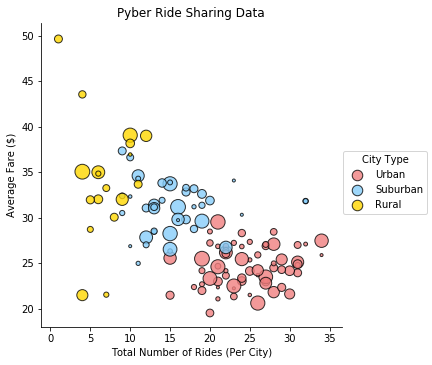

In [7]:
d_count = new_data['Driver Count per City']
sns.lmplot(x='Total Number of Rides (Per City)',
           y='Average Fare ($)',
           data=new_data,
           hue='City Type',
           palette=dict(Urban='lightcoral', Suburban='lightskyblue', Rural='gold'),
           fit_reg=False,
           scatter_kws={'s':d_count*3, 'edgecolors':'black'},
           legend=True)
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

In [8]:
# Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

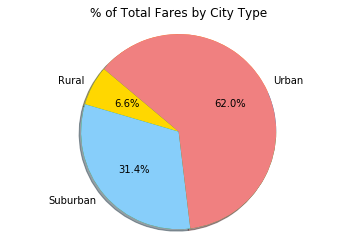

In [9]:
city_data = city_data.rename(columns={'City':'city'})
percent_data = city_data.merge(ride_data,on='city')
percent_data = percent_data.groupby('City Type').sum()
percent_data = percent_data.drop(columns=['ride_id','Driver Count per City'])
percent_data = percent_data.rename(columns={'fare':'Fare'})
plt.pie(percent_data)
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0, 0, 0]
sizes = [4255.09, 20335.69, 40078.34]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Total Fares by City Type')

In [10]:
# Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

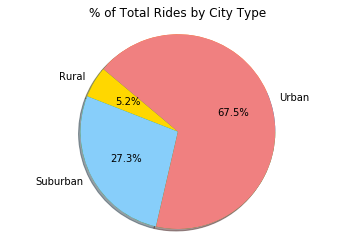

In [11]:
total_rides = city_data.merge(ride_data,on='city')
total_rides = total_rides['City Type'].value_counts()
total_rides = total_rides.to_frame()
plt.pie(percent_data)
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0, 0, 0]
sizes = [125, 657, 1625]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Total Rides by City Type')

In [12]:
# Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

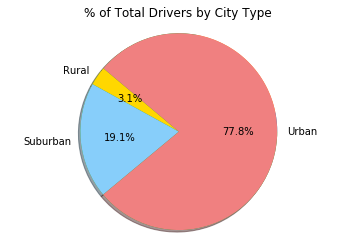

In [13]:
total_drivers = city_data.groupby('City Type').sum()
plt.pie(total_drivers)
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0, 0, 0]
sizes = [104, 638, 2607]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Total Drivers by City Type')